In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE

In [5]:
# Load the dataset
df = pd.read_csv('creditcard.csv')

In [6]:
# reset the index
df.reset_index(drop=True, inplace=True)
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Explore the dataset
print("Dataset columns:")
print(df.columns)
print("\nDataset shape:")
print(df.shape)

Dataset columns:
Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Dataset shape:
(284807, 31)


In [8]:
df['Time']

0              0.0
1              0.0
2              1.0
3              1.0
4              2.0
            ...   
284802    172786.0
284803    172787.0
284804    172788.0
284805    172788.0
284806    172792.0
Name: Time, Length: 284807, dtype: float64

In [9]:
# change time feature from seconds to hour
df['Hours'] = df['Time'] / 3600
print(df['Hours'])  

0          0.000000
1          0.000000
2          0.000278
3          0.000278
4          0.000556
            ...    
284802    47.996111
284803    47.996389
284804    47.996667
284805    47.996667
284806    47.997778
Name: Hours, Length: 284807, dtype: float64


In [10]:
# Display the first few rows of the dataset
print("\nFirst few rows:")
print(df.head())


First few rows:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V22       V23       V24       V25       V26  \
0  0.098698  0.363787  ...  0.277838 -0.110474  0.066928  0.128539 -0.189115   
1  0.085102 -0.255425  ... -0.638672  0.101288 -0.339846  0.167170  0.125895   
2  0.247676 -1.514654  ...  0.771679  0.909412 -0.689281 -0.327642 -0.139097   
3  0.377436 -1.387024  ...  0.005274 -0.190321 -1.175575  0.647376 -0.221929   
4 -0.270533  0.817739  ...  0.798278 -0.137458  0.141267 -0.206010  0.502292   

        V27    

In [12]:
# Display the summary statistics of the dataset
print("\nSummary statistics:")
print(df.describe())


Summary statistics:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  

In [11]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())
print("\nTotal missing values:")
print(df.isnull().sum().sum())


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hours     0
dtype: int64

Total missing values:
0


In [10]:
# Check for duplicate rows
print("\nDuplicate rows:")
print(df.duplicated().sum())
print(df.duplicated())


Duplicate rows:
1081
0         False
1         False
2         False
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806    False
Length: 284807, dtype: bool


In [11]:
# Display the class distribution
print("\nClass distribution:")  
print(df['Class'].value_counts())


Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [12]:
#          EXPLORAYORY DATA ANALYSIS 
#        V  i s u a l i z a t i o n  S 

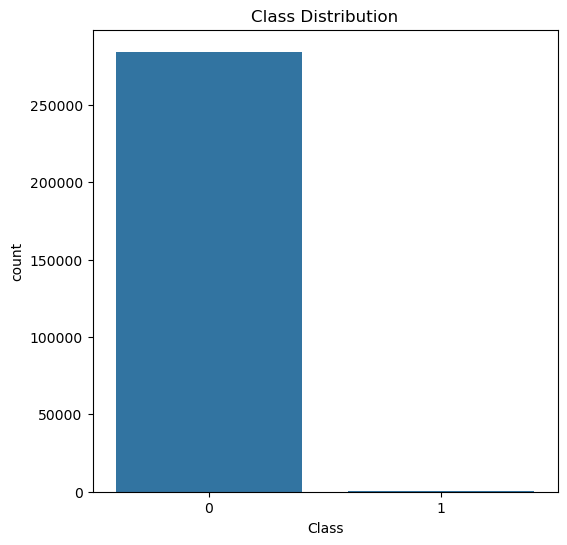

In [ ]:
# Plot Class distribution
plt.figure(figsize=(6, 6))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()


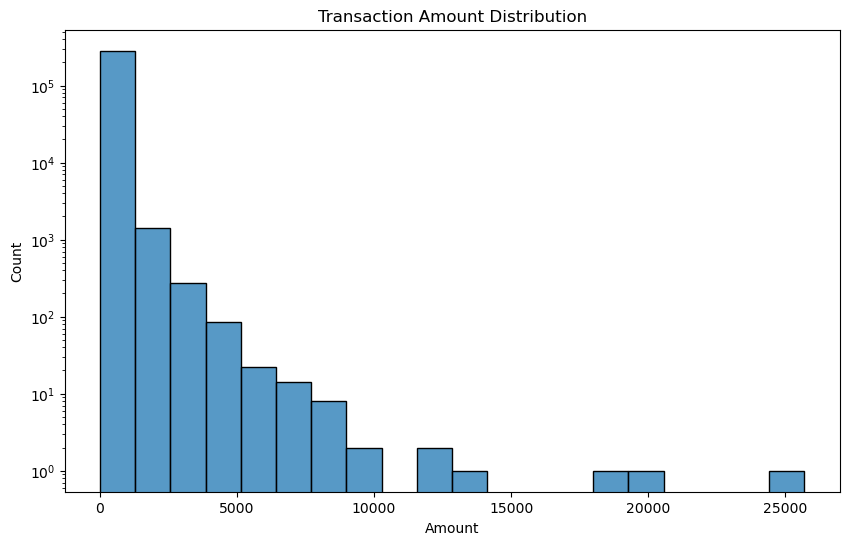

In [ ]:
# Plot Amount distribution
plt.figure(figsize=(10, 6))
plt.yscale('log')   
sns.histplot(data=df, x='Amount', bins=20)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

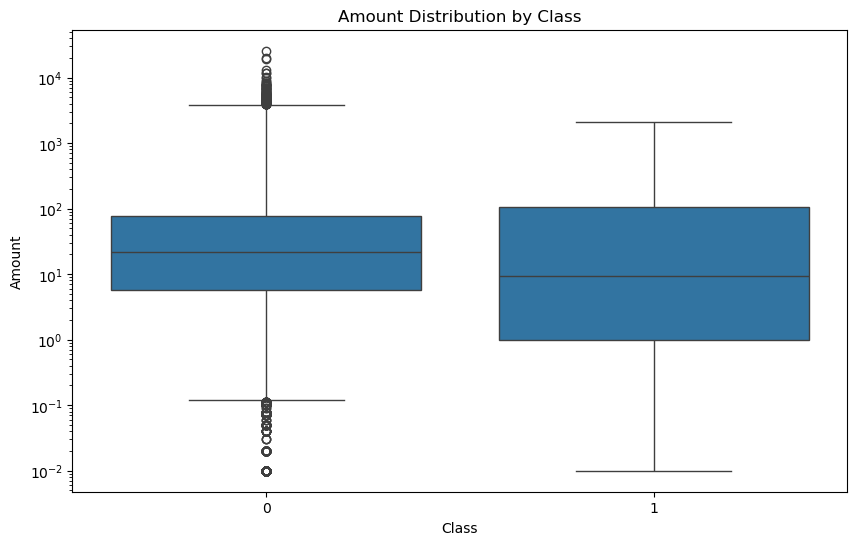

In [ ]:
# Plot Amount distribution for both classes separately
plt.figure(figsize=(10, 6))
plt.yscale('log')
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Amount Distribution by Class')
plt.show()

In [43]:
#---TIME DISTRIBUTION ANALYSIS---

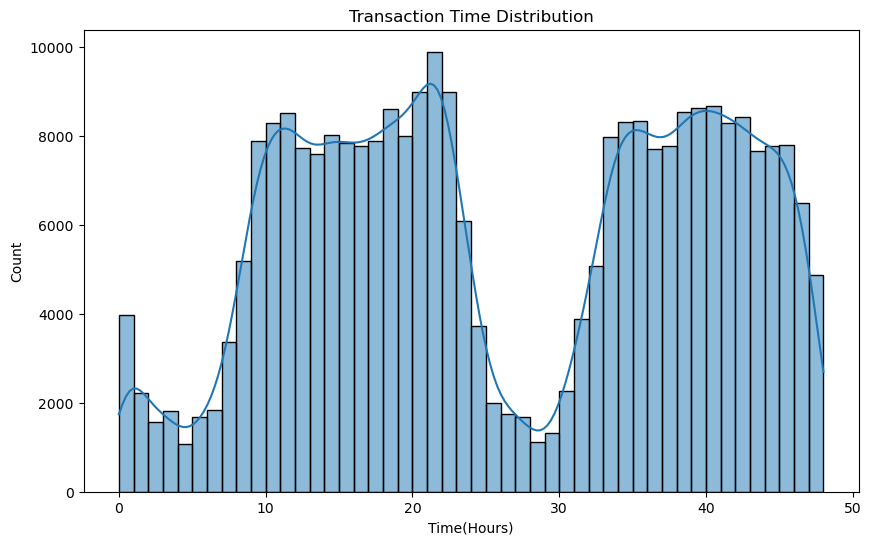

In [49]:
# Time distribution in hours
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Hours', bins=48, kde=True)
plt.title('Transaction Time Distribution')
plt.xlabel('Time(Hours)')
plt.ylabel('Count')
plt.show()

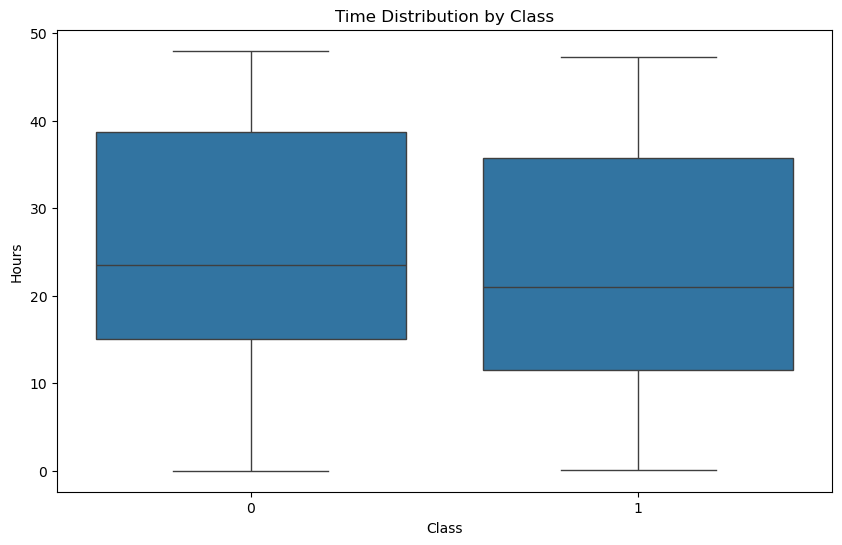

In [51]:
# Time distribution for both classes separately
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Hours', data=df)
plt.title('Time Distribution by Class')
plt.show()

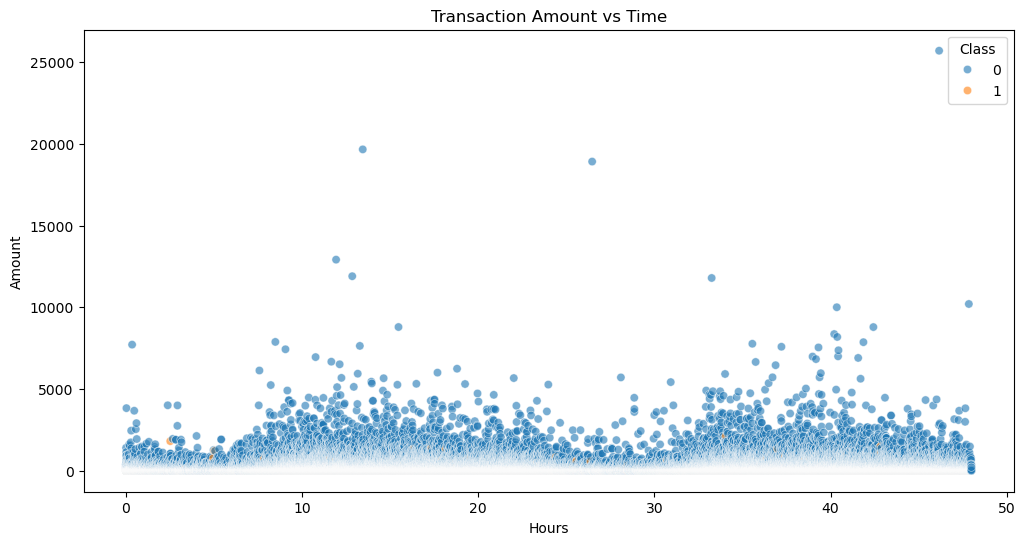

In [53]:
# Transaction frequency over time
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='Hours', y='Amount', hue='Class', alpha=0.6)
plt.title('Transaction Amount vs Time')
plt.show()

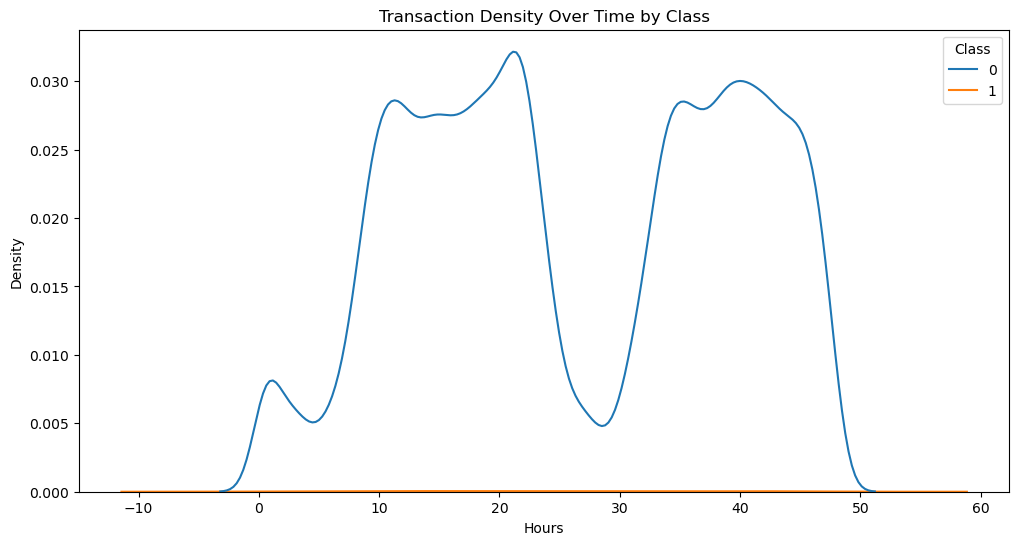

In [55]:
# Transaction density over time
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='Hours', hue='Class')
plt.title('Transaction Density Over Time by Class')
plt.show()

In [57]:
#              ---FEATURE DISTRIBUTIONS---

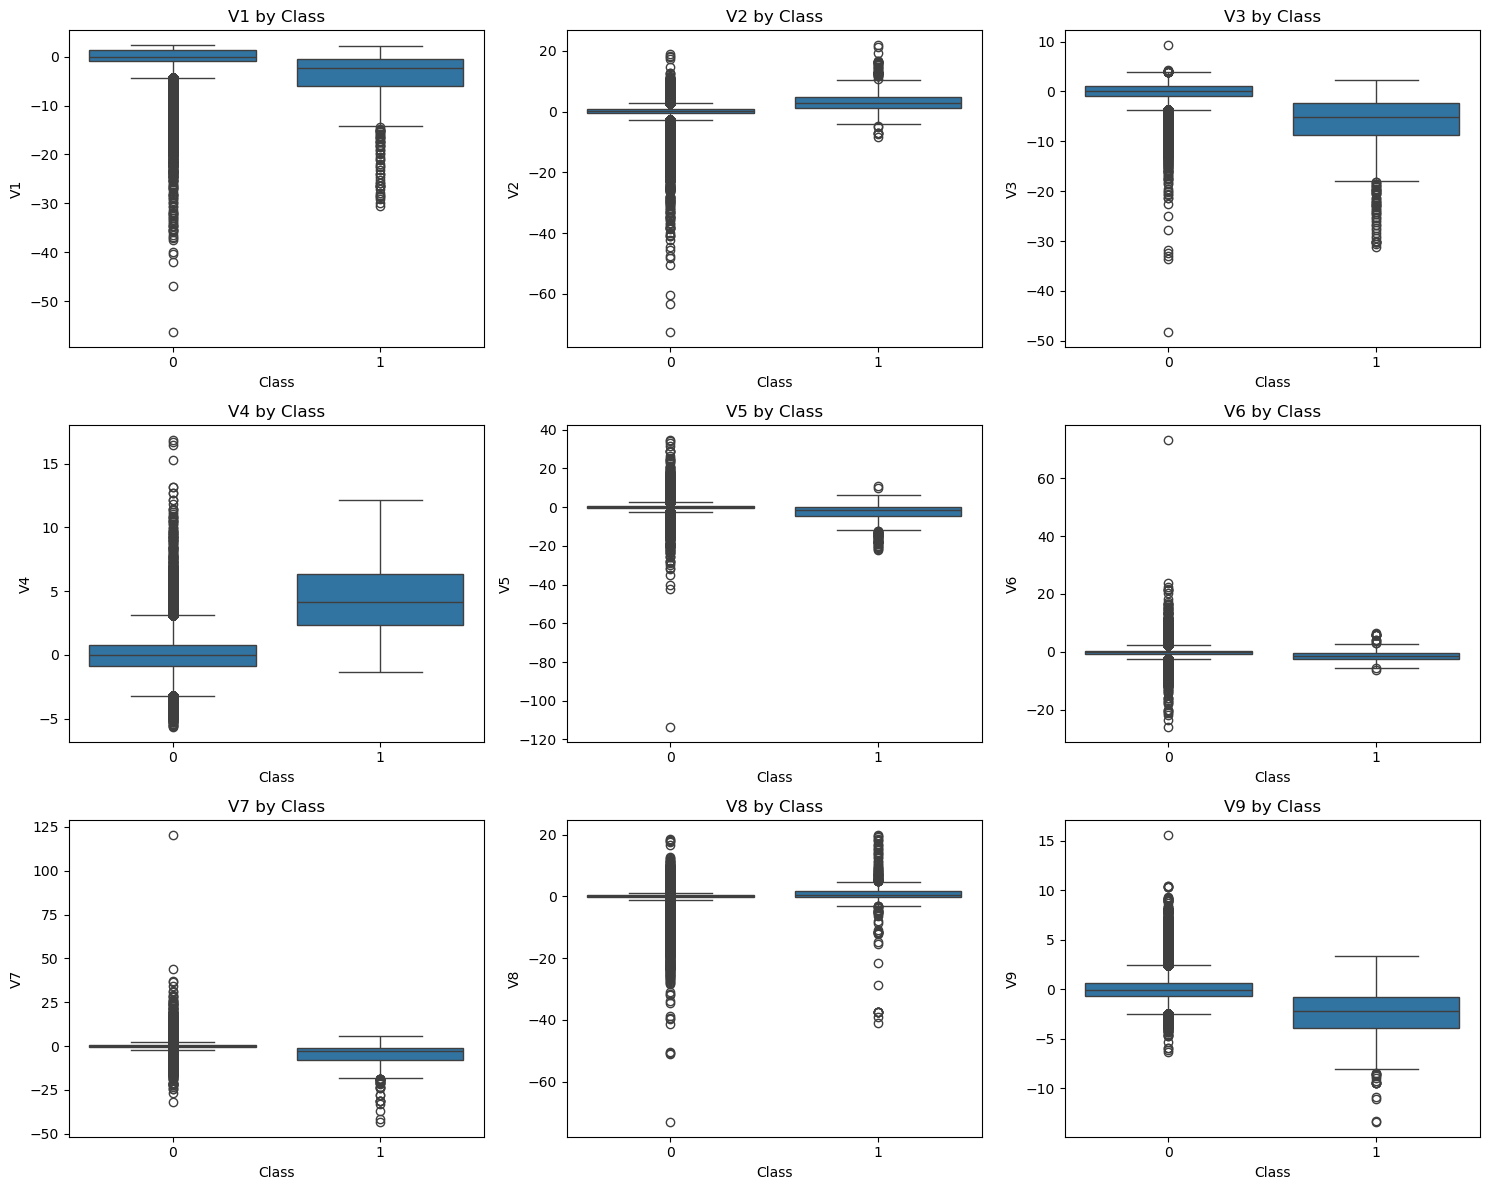

In [59]:
# Box plots for features by class
def plot_feature_boxplots(df, features, rows=3, cols=3):
    plt.figure(figsize=(15, 4*rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(x='Class', y=feature, data=df)
        plt.title(f'{feature} by Class')
    plt.tight_layout()
    plt.show()

features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

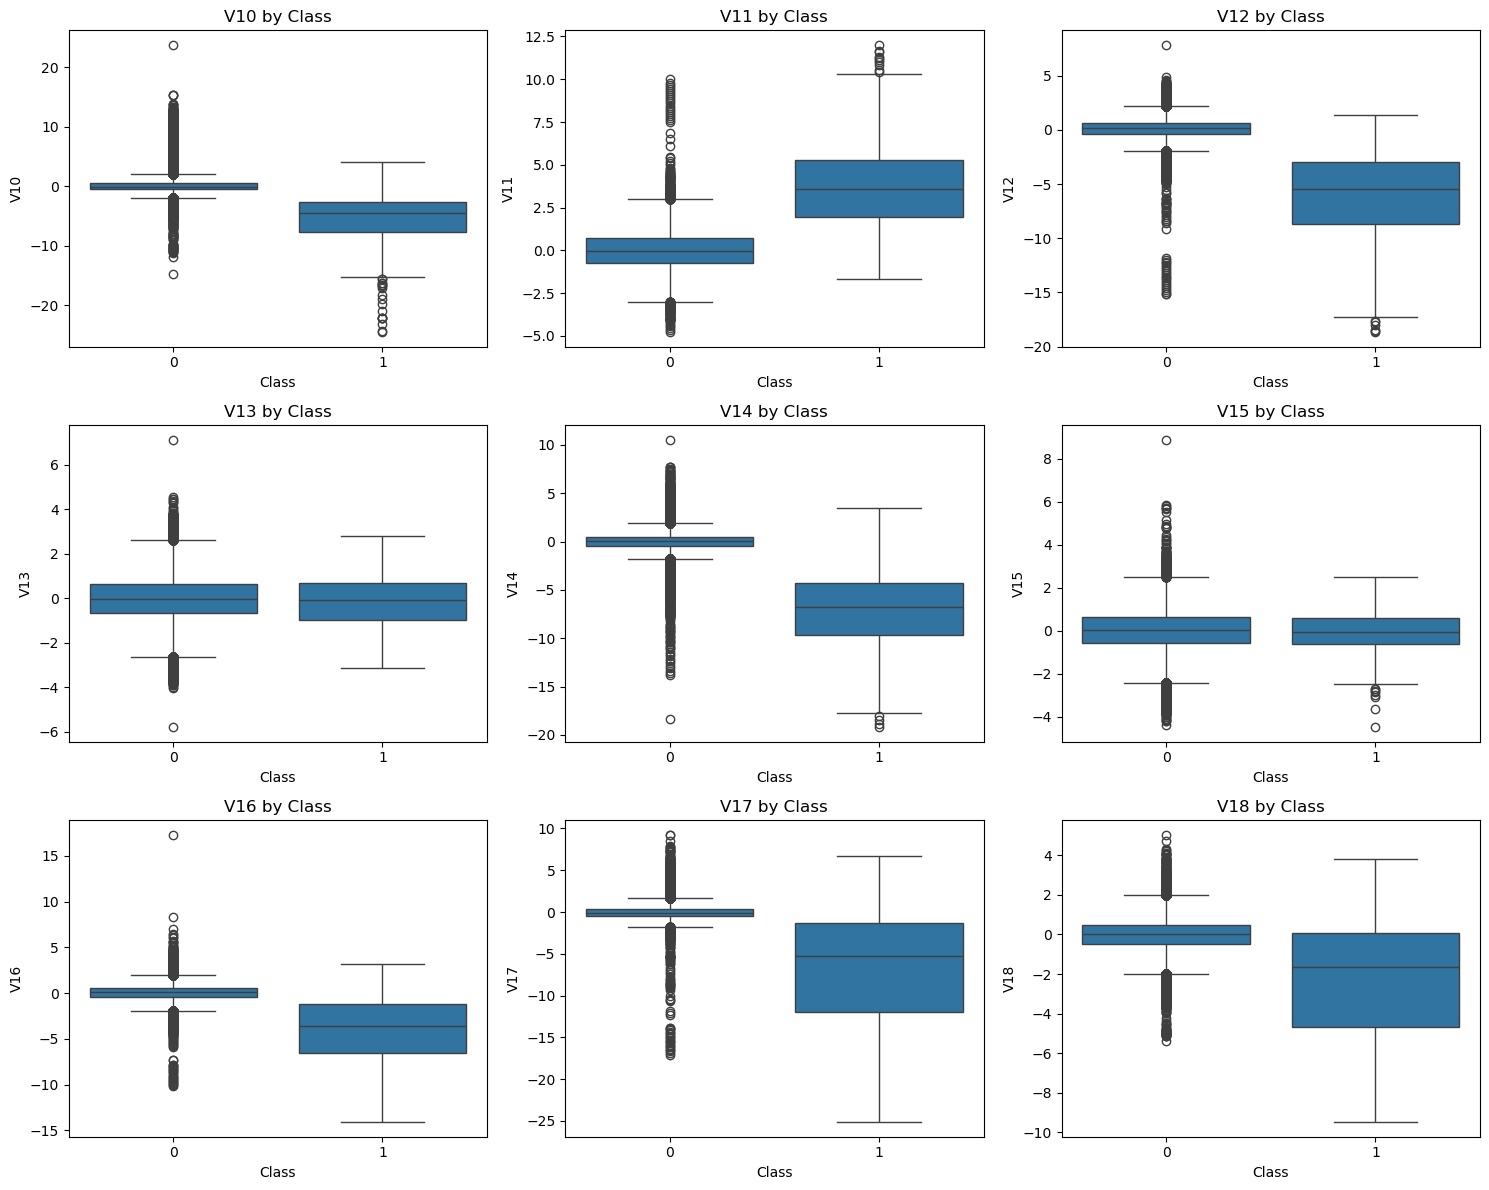

In [62]:
features = ['V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

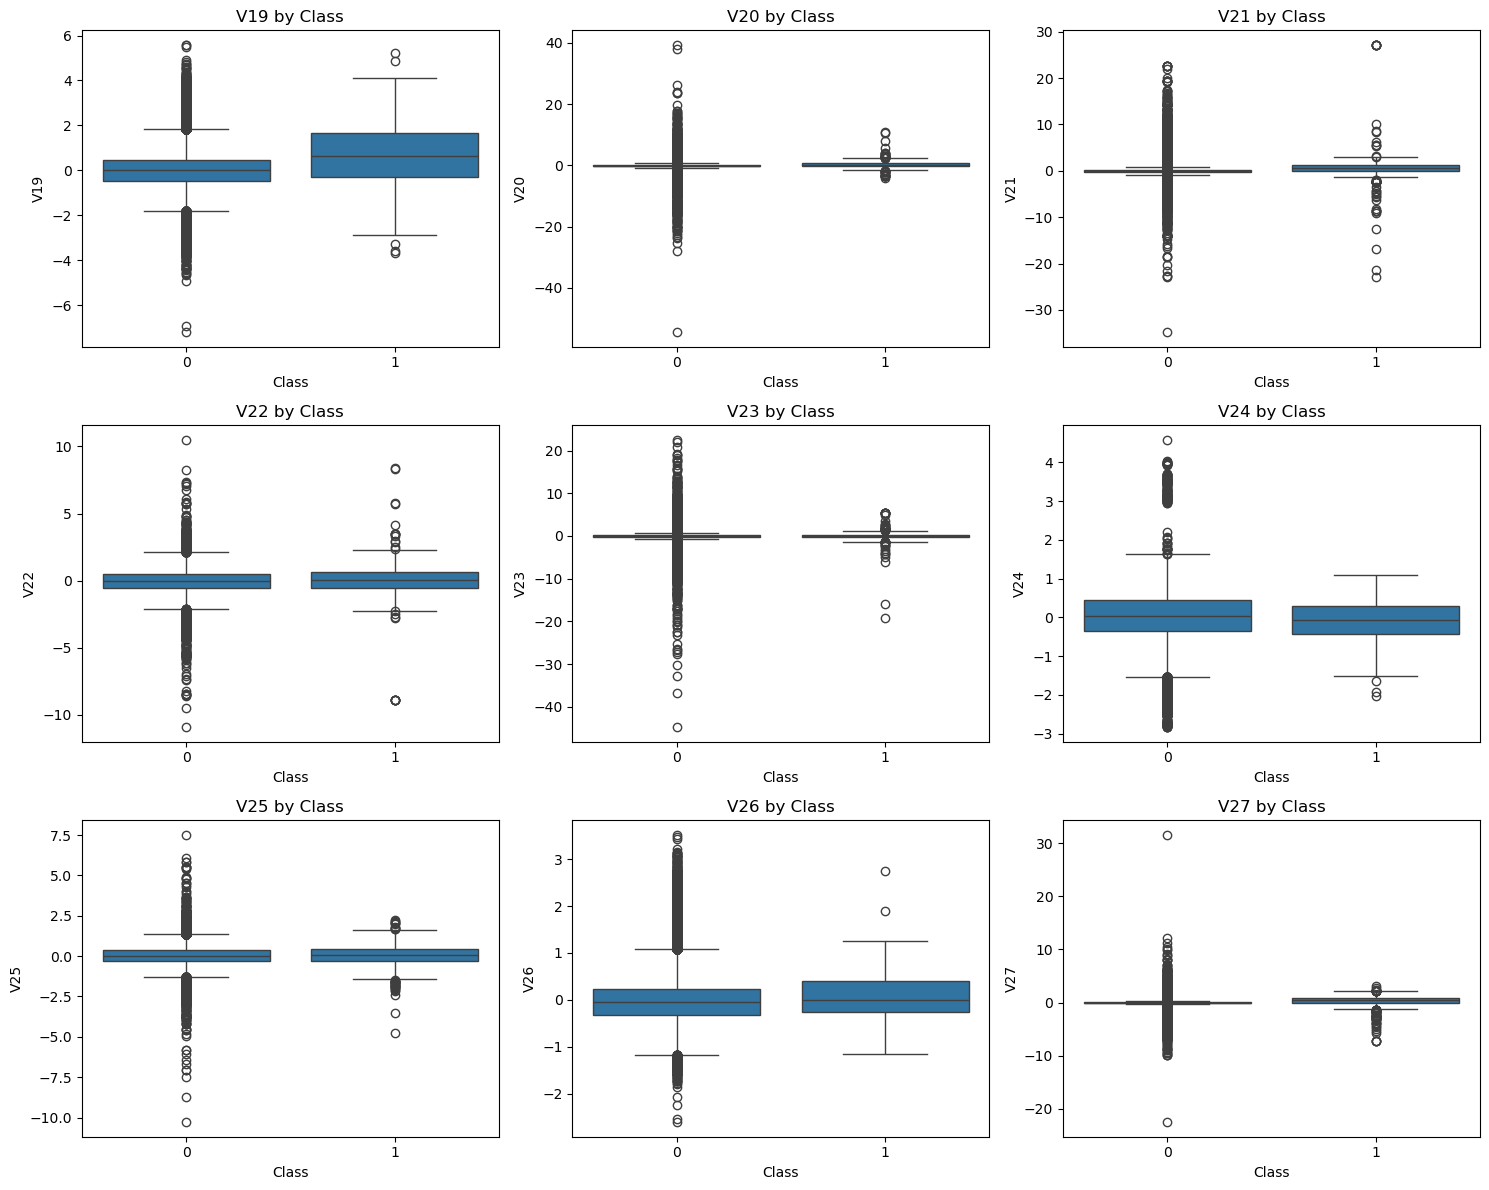

In [64]:
features = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

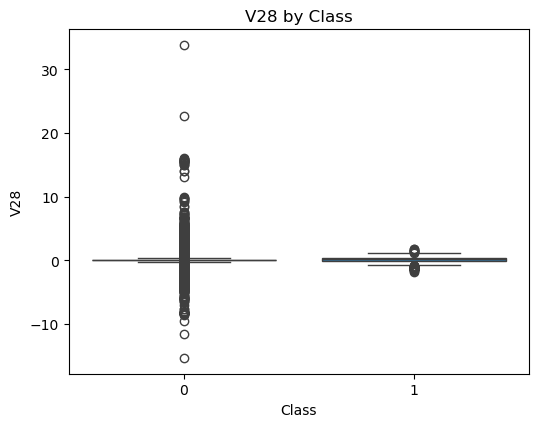

In [66]:
features = ['V28']    # ADD MORE UNTIL V28
plot_feature_boxplots(df, features)

In [13]:
# Distribution of numeric features(V1-V28)
# Define function for visualizing plots
def plot_feature_distributions(df, features, rows=3, cols=3):
    plt.figure(figsize=(15, 4*rows))
    for i, feature in enumerate(features, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(data=df, x=feature, hue='Class', multiple="stack")
        plt.yscale('log')
        plt.xlabel(" ")
        plt.title(f'{feature} Distribution by Class')
    plt.tight_layout()
    plt.show()
features = ['V28']

In [ ]:
# Use for V1-V28 features
features = ['V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27'] 
plot_feature_distributions(df, features)

KeyboardInterrupt: 

In [ ]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9'] 
plot_feature_distributions(df, features)

In [ ]:
# Pair plots for important features                               
plt.figure(figsize=(12, 8))
selected_features = ['Amount', 'Hours', 'V1', 'V2', 'Class']
sns.pairplot(df[selected_features], hue='Class', diag_kind='hist')
plt.show()

In [1]:
# ------                                    -------
# ------CORRELATION OF V-FEATURES WITH CLASS------

In [ ]:
# Correlation Matrix Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [ ]:
# Get correlation with Class label for V-features
v_features = [col for col in df.columns if col.startswith('V')]
correlations = df[v_features + ['Class']].corr()['Class'].sort_values(ascending=False)

# Display correlations with Class
print("\nCorrelations of V-features with Class:")
print(correlations)

In [ ]:
# Plot top 10 most correlated V-features
plt.figure(figsize=(12, 6))
top_10_corr = correlations[1:11]  # Exclude Class itself
sns.barplot(x=top_10_corr.index, y=top_10_corr.values)
plt.xticks(rotation=45)
plt.title('Top 10 V-Features Correlated with Fraud')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.tight_layout()
plt.show()

In [ ]:
# Create heatmap of top 10 correlated features
plt.figure(figsize=(12, 8))
top_10_features = top_10_corr.index.tolist() + ['Class']
sns.heatmap(df[top_10_features].corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Top 10 V-Features')
plt.tight_layout()
plt.show()

In [ ]:
#             -----  FEATURE SELECTION  -----

In [1]:
# Random Forest Feature Importance
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler


In [14]:
# Prepare features (excluding Class and Time)
X = df.drop(['Class'], axis=1)
y = df['Class']
y.head()
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hours
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.000556


In [15]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


In [ ]:
# Train a Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_scaled, y)

In [ ]:
# Get feature importance
importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 important features:")
print(importance.head(10))

In [ ]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=importance.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

In [ ]:
# Select top features for modeling
top_features = importance['feature'].head(10).tolist()
X_selected = df[top_features]
y = df['Class']


In [ ]:
# Scale the selected features
X_selected_scaled = scaler.transform(X_selected)
X_selected_scaled = pd.DataFrame(X_selected_scaled, columns=top_features)

print("\nSelected features for modeling:")
print(top_features)


In [ ]:
# -----  DATA SPLITTING  -----

In [ ]:
# Split the data while preserving the ratio of fraud/non-fraud cases
X_train, X_test, y_train, y_test = train_test_split(
    X_selected_scaled, 
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
# Print the shapes of resulting datasets
print("\nData splitting results:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

In [ ]:
# Verify class distribution in splits
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts(normalize=True))
print("\nClass distribution in testing set:")
print(pd.Series(y_test).value_counts(normalize=True))

In [ ]:
# Save split information for later use
split_info = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test
}

In [ ]:
#  -----  RANDOM FOREST MODEL IMPLEMENTATION  -----

In [ ]:
def train_evaluate_rf(X_train, X_test, y_train, y_test):
    # Handle class imbalance using SMOTE
    resampler = SMOTE(sampling_strategy='auto', random_state=42)
    X_balanced, y_balanced = resampler.fit_resample(X_train, y_train)
    
    # Initialize model with custom parameters
    rf_classifier = RandomForestClassifier(
        n_estimators=150,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        class_weight='balanced_subsample',
        random_state=42
    )
    
    # Train model
    rf_classifier.fit(X_balanced, y_balanced)
    
    # Generate predictions
    predictions = rf_classifier.predict(X_test)
    prob_predictions = rf_classifier.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    conf_matrix = confusion_matrix(y_test, predictions)
    class_report = classification_report(y_test, predictions)
    auc_score = roc_auc_score(y_test, prob_predictions)
    
    return rf_classifier, conf_matrix, class_report, auc_score, prob_predictions


In [ ]:
# Train and evaluate model
model, conf_mat, class_rep, auc, probas = train_evaluate_rf(X_train, X_test, y_train, y_test)

In [ ]:
# Display results
print("\n=== Random Forest Performance Metrics ===")
print("\nConfusion Matrix:")
print(conf_mat)
print("\nDetailed Classification Report:")
print(class_rep)
print(f"Area Under ROC Curve: {auc:.4f}")

In [ ]:
# Create custom ROC visualization
def plot_custom_roc(y_true, y_prob):
    false_pos_rate, true_pos_rate, _ = roc_curve(y_true, y_prob)
    
    plt.figure(figsize=(8, 6))
    plt.plot(false_pos_rate, true_pos_rate, 
             color='darkblue', 
             linestyle='-', 
             linewidth=2, 
             label=f'RF Model (AUC = {auc:.3f})')
    
    # Add diagonal reference line
    plt.plot([0, 1], [0, 1], 
             color='gray', 
             linestyle=':', 
             linewidth=1.5)
    
    # Customize plot
    plt.grid(True, alpha=0.3)
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Random Forest ROC Curve Analysis')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()

# Generate ROC plot
plot_custom_roc(y_test, probas)

In [ ]:
#       ----- CROSS VALIDATION -----

In [ ]:
def perform_cross_validation(X, y, n_splits=5):
    # Initialize stratified K-Fold
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
    
    # Lists to store metrics
    metrics = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1': [],
        'auc': []
    }
    
    print(f"\n=== {n_splits}-Fold Cross Validation Results ===")

In [ ]:
# Perform cross-validation
    for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
        # Split data
        X_fold_train, X_fold_val = X.iloc[train_idx], X.iloc[val_idx]
        y_fold_train, y_fold_val = y.iloc[train_idx], y.iloc[val_idx]
        
        # Train and evaluate model
        _, _, _, fold_auc, y_pred_proba = train_evaluate_rf(
            X_fold_train, X_fold_val, y_fold_train, y_fold_val
        )
        
        # Get predictions
        y_pred = (y_pred_proba >= 0.5).astype(int)
        
        # Calculate metrics
        metrics['accuracy'].append(accuracy_score(y_fold_val, y_pred))
        metrics['precision'].append(precision_score(y_fold_val, y_pred))
        metrics['recall'].append(recall_score(y_fold_val, y_pred))
        metrics['f1'].append(f1_score(y_fold_val, y_pred))
        metrics['auc'].append(fold_auc)
        
        print(f"\nFold {fold} Results:")
        print(f"Accuracy: {metrics['accuracy'][-1]:.4f}")
        print(f"Precision: {metrics['precision'][-1]:.4f}")
        print(f"Recall: {metrics['recall'][-1]:.4f}")
        print(f"F1-Score: {metrics['f1'][-1]:.4f}")
        print(f"AUC-ROC: {metrics['auc'][-1]:.4f}")
    
    # Print average results
    print("\nAverage Metrics:")
    for metric, values in metrics.items():
        print(f"{metric.capitalize()}: {np.mean(values):.4f} (+/- {np.std(values):.4f})")

# Perform cross-validation
perform_cross_validation(X_selected_scaled, y)

In [ ]:
# -----  HYPERPARAMETER TUNING  -----
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest
rf_classifier = RandomForestClassifier(
    class_weight='balanced_subsample',
    random_state=42
)

In [ ]:
# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=rf_classifier,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1
)

# Perform Grid Search
grid_search.fit(X_selected_scaled, y)

In [ ]:
# Get best parameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

In [ ]:
# Get best model
best_model = grid_search.best_estimator_

In [ ]:
# Train and evaluate best model
best_model.fit(X_train, y_train)
best_predictions = best_model.predict(X_test)
best_probas = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate metrics
best_conf_matrix = confusion_matrix(y_test, best_predictions)
best_class_report = classification_report(y_test, best_predictions)
best_auc_score = roc_auc_score(y_test, best_probas)

# Display results
print("\n=== Best Model Performance Metrics ===")
print("\nConfusion Matrix:")
print(best_conf_matrix)
print("\nDetailed Classification Report:")
print(best_class_report)
print(f"Area Under ROC Curve: {best_auc_score:.4f}")

In [ ]:
# Generate ROC plot for best model
plot_custom_roc(y_test, best_probas)

In [ ]:
# -----  FEATURE IMPORTANCE OF BEST MODEL  -----

In [ ]:
# Get feature importance of best model
best_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

In [ ]:
# Display top 10 features
print("\nTop 10 Important Features of Best Model:")
print(best_importance.head(10))

In [ ]:
# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='feature', y='importance', data=best_importance.head(10))
plt.xticks(rotation=45)
plt.title('Top 10 Important Features of Best Model')
plt.tight_layout()
plt.show()

In [ ]:
# ----- FINAL EVALUATION STEP -----

# load library to Perform final evaluation
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# Use the best model to predict on the test set
final_predictions = best_model.predict(X_test)
final_probas = best_model.predict_proba(X_test)[:, 1]

In [ ]:
# Calculate final evaluation metrics
final_conf_matrix = confusion_matrix(y_test, final_predictions)
final_class_report = classification_report(y_test, final_predictions)
final_auc = roc_auc_score(y_test, final_probas)

# Display final evaluation results
print("\n=== FINAL EVALUATION METRICS ===")
print("\nFinal Confusion Matrix:")
print(final_conf_matrix)
print("\nFinal Classification Report:")
print(final_class_report)
print(f"Final ROC AUC Score: {final_auc:.4f}")

In [ ]:
# Plot the final ROC curve
fpr, tpr, _ = roc_curve(y_test, final_probas)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkblue', linestyle='-', linewidth=2, label=f'Best RF (AUC = {final_auc:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', linewidth=1.5)  # Diagonal reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Final ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [ ]:
# Save the model
import joblib
joblib.dump(best_model, 'creditcard_model.pkl')

# Save the split information
#joblib.dump(split_info, 'split_info.pkl')


In [ ]:
# Save model, scaler, and important information
model_info = {
    'model': best_model,
    'scaler': scaler,
    'top_features': top_features,
    'optimal_threshold': optimal_threshold
}
joblib.dump(model_info, 'ccf_model.pkl')
print("\nModel and components saved successfully.")


In [ ]:
# ----- PREDICTION ON NEW DATA -----
def predict_fraud(new_data):
    """
    Make predictions on new credit card transactions
    Parameters:
        new_data: DataFrame containing new transactions
    Returns:
        DataFrame with predictions and probabilities
    """
    # Scale the features
    new_data_scaled = scaler.transform(new_data)
    new_data_scaled = pd.DataFrame(new_data_scaled, columns=new_data.columns)
    
    # Select top features
    new_data_selected = new_data_scaled[top_features]
    
    # Make predictions
    predictions = best_model.predict(new_data_selected)
    probabilities = best_model.predict_proba(new_data_selected)[:, 1]
    
    # Use optimal threshold
    optimized_predictions = (probabilities >= optimal_threshold).astype(int)
    
    # Add predictions to dataframe
    new_data['Fraud_Prediction'] = optimized_predictions
    new_data['Fraud_Probability'] = probabilities
    
    return new_data

In [ ]:
# Example usage (commented out until needed):
"""
# Load new transactions
new_transactions = pd.read_csv('new_transactions.csv')

# Make predictions
results = predict_fraud(new_transactions)

# Save results
results.to_csv('fraud_predictions.csv', index=False)
print("Predictions saved to 'fraud_predictions.csv'")
"""


In [ ]:
# ----- MODEL DEPLOYMENT INSTRUCTIONS -----
print("""
To use this model in production:

1. Load the saved model and components:
   model_info = joblib.load('credit_card_fraud_model.pkl')
   model = model_info['model']
   scaler = model_info['scaler']
   top_features = model_info['top_features']
   optimal_threshold = model_info['optimal_threshold']

2. Prepare new data:
   - Ensure all required features are present
   - Format should match training data

3. Make predictions using the predict_fraud() function:
   results = predict_fraud(new_data)

4. Interpret results:
   - Fraud_Prediction: 1 for fraud, 0 for legitimate
   - Fraud_Probability: Probability of transaction being fraudulent
""")